# Pression osmotique et propriétés de transport 
(ou comment prendre en compte les effets des interactions colloïdales dans les équations de transport de la matière)
Cours M2 Génie des Procédés Avancés

La présence d'interactions de surface entre colloïdes modifie les propriétés de transport. Ainsi, on peut démontrer que la diffusion collective (transport des colloïdes dans un gradient de concentration)  peut s'écrire : 
$$D=\frac{K(\phi)}{6\pi\mu a}V_p\frac{d\Pi}{d\phi}=D_0 K(\phi)\frac{V_p}{k_B T}\frac{d\Pi}{d\phi}$$
où $K(\phi)$ permet de prendre en compte l'effet de la fraction volumique, $\phi$, sur la mobilité d'une sphère en régime concentré et $\frac{d\Pi}{d\phi}$ permet de prendre en compte l'effet des interactions de surface. La variation de pression osmotique en fonction de la fraction volumique, $\Pi=f(\phi)$, representant l'équation d'état de la dispersion colloïdale.

Lorsque on utilise cette expression pour décrire un bilan de masse différentiel, il est possible de montrer qu'en régime stationnaire, le profil de concentration peut s'écrire en fonction de la pression osmotique :
- près d'une membrane fonctionnant en filtration tangentielle :
$$Pe=\frac{J\delta}{D_O}=\frac{V_p}{k_B T}\int_{\Pi_b}^{\Pi_m} \frac{K(\phi)}{\phi} \, \mathrm{d}\Pi$$
où $\delta$ est l'épaisseur de la couche limite induite par la vitesse tangentielle au dessus de la membrane
- lors d'un équilibre entre sédimentation et diffusion :
$$Pe=\frac{u_{sed}(r_1-r_2)}{D_O}=\frac{V_p}{k_B T}\int_{\Pi_1}^{\Pi_2} \frac{1}{\phi} \, \mathrm{d}\Pi$$
où les indices 1 et 2 représentent deux positions dans la hauteur du fluide qui sédimente

On peut noter qu'il est possible de retrouver les équations d'équilibre advection-diffusion classique pour le régime dilué 
$K(\phi)\rightarrow1$ et $\Pi \rightarrow \frac{k_B T \phi}{V_p}$

$$\Pi = \frac{k_B T \phi}{V_p}+0.01 (\rho_p \phi)^2$$

$$\frac{V_p}{k_B T}\int_{\Pi_1}^{\Pi_2} \frac{1}{\phi} \, \mathrm{d}\Pi=ln(\frac{\phi_m}{\phi_b})+\frac{V_p}{k_B T}2*0.05\rho_p^2 (\phi_m-\phi_b)$$


Le coefficient de diffusion en régime dilué est 1.0908479799518506e-11 m.s-2


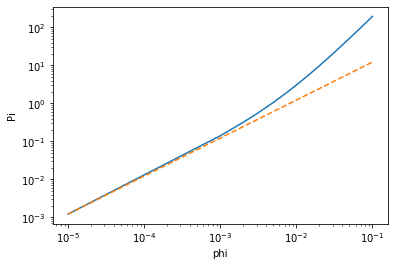

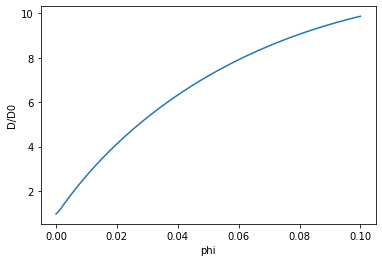

In [94]:
#Calcul des propriétés de la dispersion concentrée
from scipy.misc import derivative
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

#constant
kT= 1.38e-23*298.
#dispersion
a=20.e-9
mu=0.001
rho_p=1350 #kg m-3
vp=4*np.pi*(a**3)/3
D0=kT/(6*np.pi*mu*a)
print('Le coefficient de diffusion en régime dilué est', D0, 'm.s-2')

def K(phi):
    return (6.-9.*(abs(phi)**(1./3.))+9.*(abs(phi)**(5./3.))-6.*(abs(phi)**2.))/(6.+4.*(abs(phi)**(5./3.)))
def pi(phi):
    return kT*phi/vp+0.01*((rho_p*phi)**2)

phi_a=np.linspace(0.00001,0.1,100)
plt.loglog(phi_a,pi(phi_a))
plt.loglog(phi_a,kT*phi_a/vp,'--')
plt.xlabel('phi')
plt.ylabel('Pi')
plt.show()

D=D0*K(phi_a)*vp*derivative(pi, phi_a)/kT
plt.plot(phi_a,D/D0)
plt.xlabel('phi')
plt.ylabel('D/D0')
plt.show()


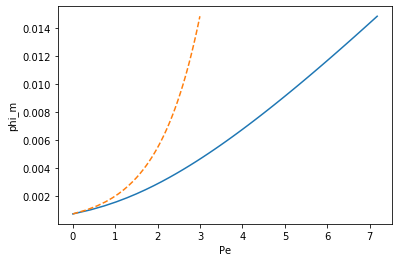

La vitesse de sédimentation en régime diluée est : 3.0520000000000004e-10


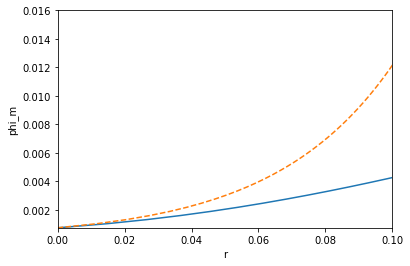

In [98]:
cb=1 #kg/m3
phi_b=cb/rho_p
pi_b=pi(phi_b)
rho_f=1000 #kg m-3
g=9.81 #m s-2
phi_m=np.linspace(phi_b, 20*phi_b)

def pe_set(phi):
    return vp/(kT*phi)
def pe_set(phi):
    return vp/(kT*phi)
def pe_fil(phi):
    return vp*K(phi)/(kT*phi)

Pe_D0=np.log(phi_m/phi_b)
Pe=np.log(phi_m/phi_b)+2*0.01*(rho_p**2)*(phi_m**1-phi_b**1)*vp/kT

plt.plot(Pe,phi_m)
plt.plot(Pe_D0,phi_m,'--')
plt.xlabel('Pe')
plt.ylabel('phi_m')
plt.show()

u_set=vp*(rho_p-rho_f)*g/(6*np.pi*mu*a)
print ('La vitesse de sédimentation en régime diluée est :', u_set)
r=Pe*D0/u_set
plt.plot(Pe*D0/u_set,phi_m)
plt.plot(Pe_D0*D0/u_set,phi_m,'--')
plt.ylabel('phi_m')
plt.xlabel('r')
plt.xlim(0., 0.1)
plt.ylim(phi_b, 0.016)
plt.show()